In [10]:
import numpy as np;                    #importing required libraries
import pandas as pd; 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("IMDB Dataset.csv")   #reading the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [164]:
df['review'][1]                    #displaying a review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

25000
25000


Text(0.5, 1.0, 'Sentiment Distribution')

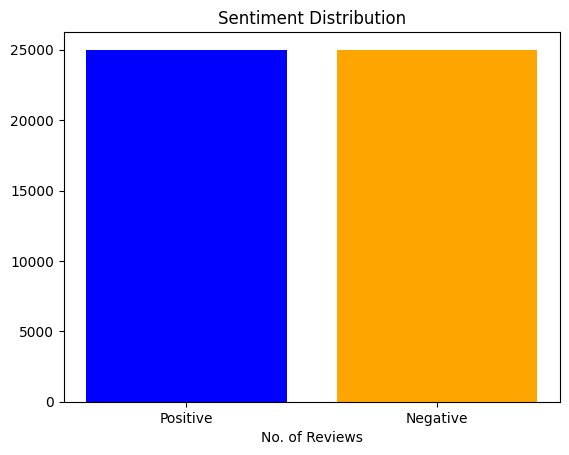

In [16]:
pos = (df["sentiment"]=='positive').sum()     #counting no. of positive reviews
print(pos)
neg = (df["sentiment"]=='negative').sum()     #counting no. of negative reviews
print(neg)

plt.bar(["Positive","Negative"], [pos,neg], color = ["Blue", "Orange"])   #distribution of reviews
plt.xlabel("Reviews")
plt.xlabel("No. of Reviews")
plt.title("Sentiment Distribution")

## Data Preprocessing / Data Cleaning

In [93]:
#Data Cleaning
#1) Remove html tags (<br>)
#2) Remove special characters
#3) Convert to lower case
#4) Remove stop words
#5) Stemming

In [166]:
#converting catergorical data to numeric data
df['sentiment'].replace({'positive':1, 'negative':0}, inplace=True)

In [167]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


#### Removing HTML tags

In [168]:
import re
clean = re.compile('<br\s*/?>')
re.sub(clean,'',df.iloc[0].review)


# <br: matches the literal characters "<br".
# \s*: matches zero or more whitespace characters (such as spaces or tabs).
# /: matches the forward slash character.
# ?: makes the preceding character (the forward slash) optional, so that the pattern can match both "<br>" and "<br />".
# >: matches the closing angle bracket character.
# So, the entire pattern matches "<br>", "<br />", or "<br/>" (with any amount of whitespace between the "br" and the slash). 

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [169]:
#function to remove html tags

def clean_html(text):
    clean = re.compile('<br\s*/?>')
    return re.sub(clean, '', text)

In [170]:
df['review'] =df['review'].apply(clean_html)

In [171]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [172]:
df['review'][3]   #all html tags are removed

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

### Converting to lower case

In [173]:
#method for converting to lower case
def convert_lower(text):
    return text.lower()
    

In [12]:
df['review'] = df['review'].apply(convert_lower)

In [13]:
df['review'][2]  #converted to lower case

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

### Removing Special Characters

In [174]:
#function to remove special characters

def remove_special(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x

In [15]:
remove_special(df['review'][0])

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [16]:
df['review']=df['review'].apply(remove_special)

In [17]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


### Removing Stop Words

##### Stop words are words that do not carry any meaning on their own. Words in english such as - 'the', 'is', 'they, 'he' etc. do not really contribute to our review analysis and hence are removed. We can remove these stop words from the text in a given corpus to clean up the data, and identify words that are more rare and potentially more relevant to what we’re interested in.

In [175]:
#removing stop words

import nltk
nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saniy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [319]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [200]:
#function to remove stopwords 

def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    z=x[:]
    x.clear()
    return z

In [21]:
df['review'] = df['review'].apply(remove_stopwords)

In [23]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1


### Stemming Words

##### Stemming is the process of reducing a word to its base or root form. The most common algorithm used for stemming is the Porter stemming algorithm. It removes the suffix from a word to produce the base form of the word, also known as the stem.

##### For example, the word "running" can be stemmed to "run", "jogging" can be stemmed to "jog", and "swimming" can be stemmed to "swim". The idea behind stemming is to reduce the number of unique words in a dataset, making it easier to analyze and process the data.

In [208]:
#perform stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
p=[]
def stem_words(text):
    
    for i in text:
        p.append(ps.stem(i))
    z=p[:] 
    p.clear()
    return z

In [25]:
df['review']=df['review'].apply(stem_words)

In [26]:
df.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, h...",1
1,"[wonder, littl, product, film, techniqu, unass...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1


In [179]:
#join back
def join_back(list_input):
    return " ".join(list_input)

df['review']=df['review'].apply(join_back)

In [28]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [33]:
#storing the cleaned data into a new csv file
df.to_csv('cleanReviews.csv', index=False)  #storing data after preprocessing and data cleaning into a new csv

In [244]:
new_df = pd.read_csv('cleanReviews.csv')
new_df.head(5)

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


### Vectorizing 

#### CountVectorizer is a preprocessing step used in natural language processing (NLP) that converts a collection of text documents to a matrix of token counts. It is a process of converting text data into a matrix of token counts. In other words, it is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [245]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=6000)    #6000 most frequent words

X = cv.fit_transform(new_df['review']).toarray()

In [246]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [247]:
y=new_df.iloc[:,-1].values
print(y)

[1 1 1 ... 0 0 0]


## Building and Training the Model

#### Splitting data into test and training data

In [248]:
from sklearn.model_selection import train_test_split     
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [249]:
print(len(x_train))
print(len(x_test))
x_train.shape

40000
10000


(40000, 6000)

In [250]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

### Applying Naive Bayes Algorithm

In [251]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
clf1=GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [252]:
clf1.fit(x_train, y_train)               #fitting the data into the model
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

BernoulliNB()

In [253]:
y_pred1 = clf1.predict(x_test)       #predicting on test data
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

### Comparing accuracies of three Naive Bayes Models
#### 1. Guasssian NB
#### 2. Mulinomial NB
#### 3. Bernaulli NB

In [315]:
from sklearn.metrics import accuracy_score

print('Gaussian:\t', accuracy_score(y_test, y_pred1)*100,'%')
print('Multinomial:\t', accuracy_score(y_test, y_pred2)*100,'%')
print('Bernaulli:\t', accuracy_score(y_test, y_pred3)*100,'%')

Gaussian:	 69.83 %
Multinomial:	 84.28 %
Bernaulli:	 84.50999999999999 %


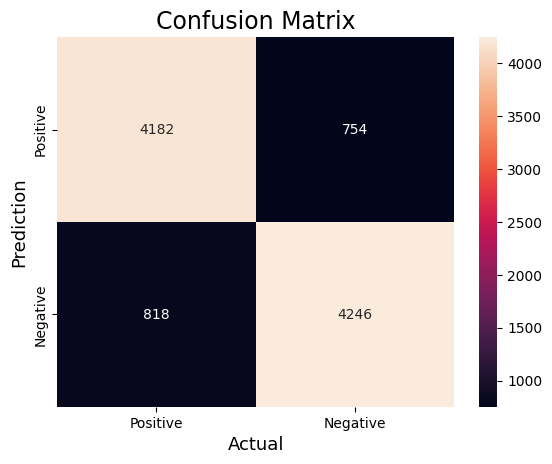

In [316]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred2)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [293]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4936
           1       0.85      0.84      0.84      5064

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Storing the Model
#### By using pickle.dump(), the models can be saved to files and loaded back into memory at a later time for prediction on new data.

In [255]:
import pickle
pickle.dump(cv, open("count-Vectorizer.pkl", "wb"))
pickle.dump(clf2, open("movie_review_sentiment.pkl", "wb"))

In [256]:
save_cv=pickle.load(open('count-Vectorizer.pkl', 'rb'))
model = pickle.load(open('movie_review_sentiment.pkl', 'rb'))

In [267]:
userReviews = []

In [268]:
def test_model(text):
    sen = save_cv.transform([text]).toarray()
    res = clf2.predict(sen)[0]
    userReviews.append(res)
    if res==1:
        return 'Positive Review'
    else:
        return 'Negative Rewiew'

In [299]:
sen = "I could think of better ways to spend time"    #True Sentiment:      Negative
res = test_model(sen)                                 #Predicted Sentiment: Negative
print(res)

Negative Rewiew


In [270]:
sen = "It was so emotional, I cried."                 #True Sentiment:      Positive
res = test_model(sen)                                 #Predicted Sentiment: Negative
print(res)

Negative Rewiew


In [300]:
sen = "It really touched my heart."                    #True Sentiment:      Positive
res = test_model(sen)                                  #Predicted Sentiment: Positive
print(res)

Positive Review


In [314]:
sen = "It was so funny! I enjoyed it!"                 #True Sentiment:      Positive
res = test_model(sen)                                  #Predicted Sentiment: Negative
print(res)

Negative Rewiew
